#### 1. 의사 결정 나무 기반 모델과 피처 중요도 측정

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# 캘리포니아 주택 데이터 불러오기
data = fetch_california_housing(as_frame=True)

# 데이터와 타겟을 하나의 데이터프레임으로 결합
housing_df = pd.DataFrame(data.data, columns=data.feature_names)
housing_df['target'] = data.target
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


###### [문제] DecisionTreeRegressor 모델을 학습시킨 후DecisionTreeRegressor 모델 객체의 피처 중요도를 얻어서 출력

In [5]:
# DecisionTreeRegressor 모델을 학습시킨 후
# DecisionTreeRegressor 모델 객체의 피처 중요도를 얻어서 출력

from sklearn.tree import DecisionTreeRegressor

# 독립/종속 변수 선언
X = housing_df.drop(['target'], axis=1)
Y = housing_df['target']

# 모델 불러오기
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X,Y)

# Feature 중요도 추출
feature_importance_dt = model_dt.feature_importances_
display(feature_importance_dt)

# feature_importance와 X.columns을 이용하여 중요도가 높은 순서로 정렬하여 출력
df_feature_importances_dt = pd.DataFrame({'Feature':X.columns, 'Importance': feature_importance_dt})
sorted_df_feature_importances_dt = df_feature_importances_dt.sort_values(by='Importance', ascending=False).reset_index(drop=True)
display(sorted_df_feature_importances_dt)

array([0.52500998, 0.05100488, 0.05341707, 0.02651485, 0.03282405,
       0.1320936 , 0.09387213, 0.08526344])

,Feature,Importance
0,MedInc,0.525010
1,AveOccup,0.132094
2,Latitude,0.093872
3,Longitude,0.085263
4,AveRooms,0.053417
5,HouseAge,0.051005
6,Population,0.032824
7,AveBedrms,0.026515


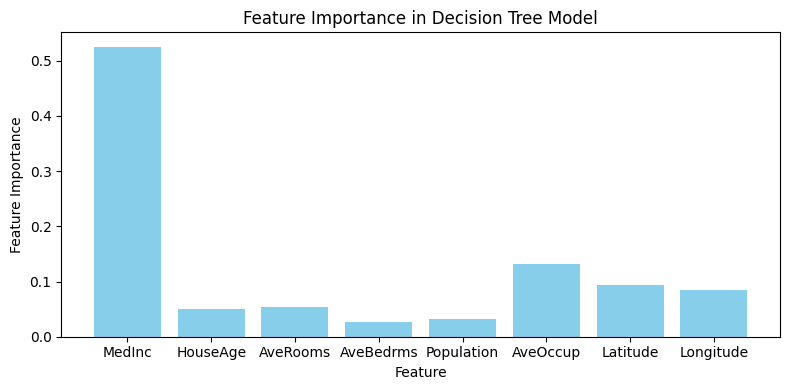

In [9]:
import matplotlib.pyplot as plt

# 피처 중요도를 수직 바 그래프로 시각화
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(X.columns, feature_importance_dt, color='skyblue')

ax.set_xlabel('Feature')
ax.set_ylabel('Feature Importance')
ax.set_title('Feature Importance in Decision Tree Model')
plt.tight_layout()
plt.show()

#### 2. 선형 모델 기반의 피처 중요도 측정

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 피처 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 스케일링된 데이터로 선형 회귀 모델 학습
model_lr_scaled = LinearRegression()
model_lr_scaled.fit(X_scaled, Y)

# 피처의 가중치를 피처 중요도로 사용 (스케일링된 모델)
feature_importances_lr = abs(model_lr_scaled.coef_)

feature_importances_lr

array([0.8296193 , 0.11875165, 0.26552688, 0.30569623, 0.004503  ,
       0.03932627, 0.89988565, 0.870541  ])

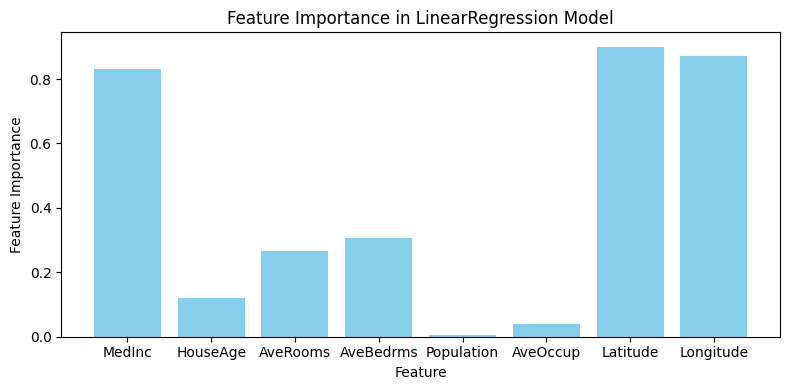

In [13]:
import matplotlib.pyplot as plt

# 피처 중요도를 시각화
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(X.columns, feature_importances_lr, color='skyblue')

ax.set_xlabel('Feature')
ax.set_ylabel('Feature Importance')
ax.set_title('Feature Importance in LinearRegression Model')
plt.tight_layout()

plt.show()